In [1]:
import csv

# Example data to write to CSV file
data = [
    ['Name', 'Age', 'Gender'],
    ['John', 30, 'Male'],
    ['Alice', 25, 'Female'],
    ['Bob', 35, 'Male']
]

# Write data to a CSV file
with open('C:/Users/hp/Downloads/twitter_training.csv/twitter_training.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)
    print("CSV file written successfully.")

# Read data from a CSV file
with open('C:/Users/hp/Downloads/twitter_training.csv/twitter_training.csv', mode='r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)


CSV file written successfully.
['Name', 'Age', 'Gender']
['John', '30', 'Male']
['Alice', '25', 'Female']
['Bob', '35', 'Male']


In [3]:
import pandas as pd

# Load the social media data from a CSV file
data = pd.read_csv("C:/Users/hp/Downloads/twitter_training.csv/twitter_training.csv")

# Display the first few rows of the DataFrame to verify column names and data
print(data.head())

# Access the text column
#text_column = data["Your_Text_Column_Name_Here"]

    Name  Age  Gender
0   John   30    Male
1  Alice   25  Female
2    Bob   35    Male


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the social media data from a CSV file
data = pd.read_csv("C:/Users/hp/Downloads/twitter_training.csv/twitter_training.csv")

# Assuming the text data is in the first column and sentiment in the second column
X = data.iloc[:, 0]  # Extracting the text data
y = data.iloc[:, 1]  # Extracting the sentiment labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the social media data using Bag-of-Words representation
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a random forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_vec, y_train)

# Predict sentiment on the testing set
y_pred = clf.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize sentiment predictions (if needed)
# For example, plot histogram or pie chart of predicted sentiments


Accuracy: 0.0


Accuracy: 0.0
Classification Report:
              precision    recall  f1-score   support

          25       0.00      0.00      0.00       0.0
          30       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.

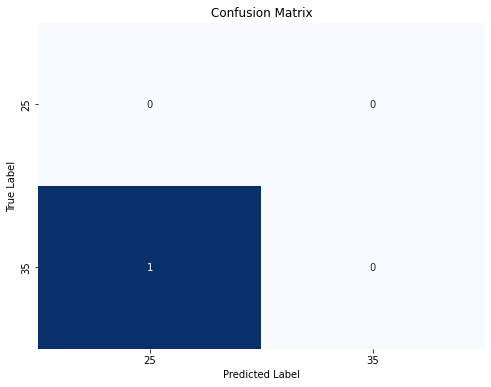

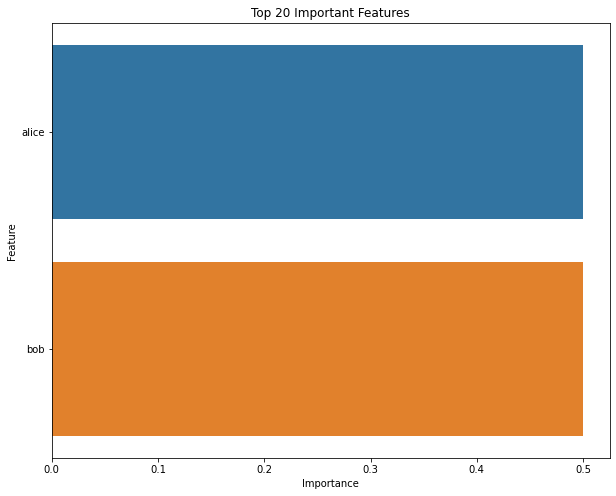

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the social media data from a CSV file
data = pd.read_csv("C:/Users/hp/Downloads/twitter_training.csv/twitter_training.csv")

# Assuming the text data is in the first column and sentiment in the second column
X = data.iloc[:, 0]  # Extracting the text data
y = data.iloc[:, 1]  # Extracting the sentiment labels

# Preprocess the text data (if needed)
# For example, remove punctuation, convert to lowercase, etc.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the social media data using Bag-of-Words representation
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a random forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_vec, y_train)

# Predict sentiment on the testing set
y_pred = clf.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Visualize feature importance
feature_importance = clf.feature_importances_
feature_names = vectorizer.get_feature_names_out()
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)[:20]  # Top 20 features
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Top 20 Important Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
